In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import dataframe
path = r'C:\Users\bruna\Career Foundry\08-2023 Instacart Basket Analysis'
ords_prods_high_act_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_high_act_cust.pkl'))

### Key Question 1: What are the busiest days of the week and hours of the day (i.e., the days and times with the most orders). 
This is in order to schedule ads at times when there are fewer orders.


### Key Question 1a: Busiest day of the week

In [70]:
# Identifying day of the week with higher number of orders
ords_prods_high_act_cust['orders_day_of_week'].value_counts(dropna = False)

0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: orders_day_of_week, dtype: int64

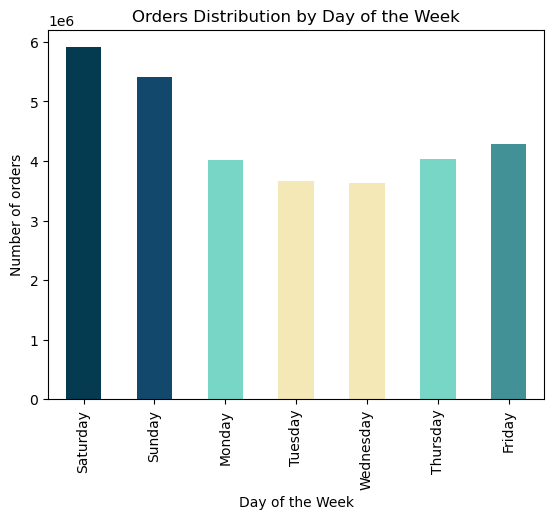

In [91]:
# Create a dictionary to map index labels to the desired day names
day_names = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
}

# Create the bar plot with renamed labels and sorted order
bar_ordersperday = ords_prods_high_act_cust['orders_day_of_week'].value_counts().sort_index().rename(day_names).plot.bar(
    color=['#053B50', '#12486B','#78D6C6','#F5E8B7','#F5E8B7', '#78D6C6','#419197']
)

# Set axis labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of orders')
plt.title('Orders Distribution by Day of the Week')

# Show the plot
plt.show()

# Export the plot
bar_ordersperday.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_ordersperday.png'))

The weekdays, spanning from Monday to Thursday, consistently exhibit the lowest order volumes. Within this period, Tuesdays and Wednesdays stand out as the days with notably reduced order activity. This lower order traffic presents a strategic opportunity for advertising campaigns. By strategically scheduling advertisements during these quieter days, we could potentially maximize their impact and engagement.

### Key Question 1b: Busiest hours of the day

In [71]:
# Identifying the busiest hours of the day
ords_prods_high_act_cust['time_of_order'].value_counts(dropna = False)

10    2649744
11    2614880
14    2567903
13    2539276
15    2535966
12    2495795
16    2413681
9     2363611
17    1982345
8     1659110
18    1551184
19    1193878
20     930909
7      863213
21     763111
22     607060
23     384554
6      281013
0      208042
1      109621
5       84418
2       65691
4       50763
3       48796
Name: time_of_order, dtype: int64

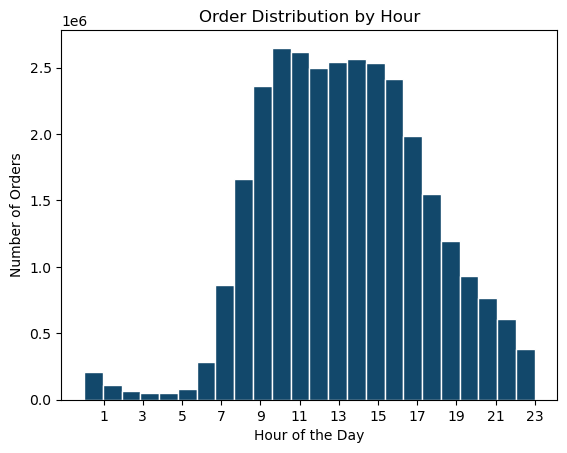

In [67]:
# Create a histogram
plt.hist(ords_prods_high_act_cust['time_of_order'], bins=24, color=['#12486B'], edgecolor='white', alpha=1)

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Order Distribution by Hour')

# Set the x-axis to represent hours of the day (0 to 23)
plt.xticks(range(1,24,2))

# Export the plot
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_ordersperhour.png'))

The peak order hours typically occur between 9 am and 5 pm, reflecting a higher demand during standard business hours. While there are still orders placed in the earlier hours, from 7 am to 9 am, and during the evening hours, from 5 pm to 11 pm, they notably taper off. This presents an opportunity for growth through strategic marketing and advertising efforts during these time frames.

Conversely, orders placed between 11 pm and 7 am remain quite limited, suggesting that advertising during these late-night and early morning hours may not yield substantial results due to low activity and potential limited audience engagement.

##### Conclusion Key Question 1:
To optimize the impact of your advertising campaigns:
1. Focus on peak hours between 9 am and 5 pm for maximum visibility and engagement.
2. Leverage the quieter hours between 7 am to 9 am and 5 pm to 11 pm for strategic marketing efforts.
3. Consider prioritizing advertising on Tuesdays and Wednesdays, the least busy weekdays.
4. Exercise caution when scheduling advertisements during late-night and early morning hours due to limited order activity.

### Key Question 2: Are there particular times of the day when people spend the most money
This might inform the type of products they advertise at these times


30964564 30964564


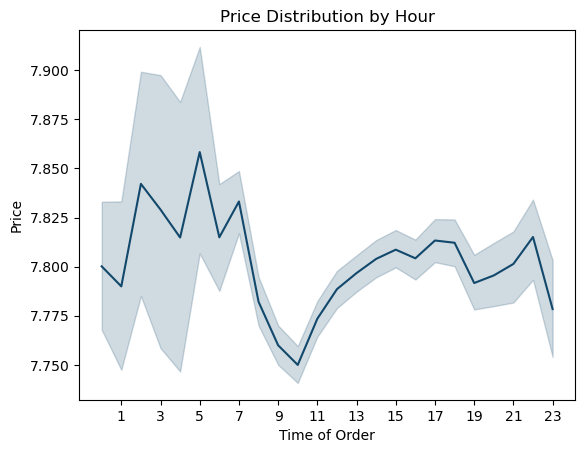

In [3]:
# Create a list holding True/False values to the test np.random.rant()<= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_high_act_cust)) <= 0.7

# Store 70% of the sample in the dataframe big and 30% in dataframe small
big = ords_prods_high_act_cust[dev]
small = ords_prods_high_act_cust[~dev]

# Double check length of original dataframe vs both samples together
print(len(ords_prods_high_act_cust), len(big) + len(small))

# Reduce the sample to only the columns needed for the chart (using small sample)
ords_prods_small_time = small[['time_of_order','prices']]

# Create the chart
line_time = sns.lineplot(data = ords_prods_small_time, x = 'time_of_order',y = 'prices', color='#12486B')

# Set labels and title
line_time.set_xlabel('Time of Order')
line_time.set_ylabel('Price')
line_time.set_title('Price Distribution by Hour')

# Customize x-axis ticks and labels
line_time.set_xticks(range(1, 25, 2))  # Start at 1, end at 24, with a step of 2
line_time.set_xticklabels([str(i) for i in range(1, 25, 2)])  # Custom labels

# Export visualisation
line_time.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_price_vs_hourofday.png'))

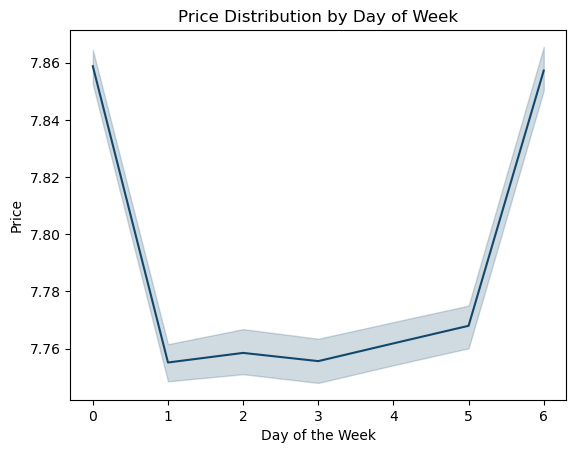

In [9]:
# Reduce the sample to only the columns needed for the chart (using small sample)
ords_prods_small_dow = small[['orders_day_of_week','prices']]

# Create the chart
line_dow = sns.lineplot(data = ords_prods_small_dow, x = 'orders_day_of_week',y = 'prices',color='#12486B')

# Set labels and title
line_dow.set_xlabel('Day of the Week')
line_dow.set_ylabel('Price')
line_dow.set_title('Price Distribution by Day of Week')

# Export visualisation
line_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_price_vs_dayofweek.png'))

### Key Question 3: Are there certain types of products that are more popular than others? 
The marketing and sales teams want to know which departments have the highest frequency of product orders.


In [3]:
# Adding a column department to the database

# Department naming
department_mapping = {
    1: 'Frozen',
    2: 'Other',
    3: 'Bakery',
    4: 'Produce',
    5: 'Alcohol',
    6: 'International',
    7: 'Beverages',
    8: 'Pets',
    9: 'Dry goods pasta',
    10: 'Bulk',
    11: 'Personal care',
    12: 'Meat seafood',
    13: 'Pantry',
    14: 'Breakfast',
    15: 'Canned goods',
    16: 'Dairy eggs',
    17: 'Household',
    18: 'Babies',
    19: 'Snacks',
    20: 'Deli',
    21: 'Missing'
}

# Add a new column with the department names
ords_prods_high_act_cust['department'] = ords_prods_high_act_cust['department_id'].map(department_mapping)

# Display the DataFrame
ords_prods_high_act_cust.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,first_order_flag,product_id,add_to_cart_order,reordered,...,nr_dependants,fam_status,income,_merge,region,cust_activity_flag,age_flag,income_flag,fam_demog_flag,department
0,2539329,1,1,2,8,NaN,True,196,1,0,...,3,married,40423,both,South,High activity customer,Young,Low income,Young family,Beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,...,3,married,40423,both,South,High activity customer,Young,Low income,Young family,Beverages
2,473747,1,3,3,12,21.0,False,196,1,1,...,3,married,40423,both,South,High activity customer,Young,Low income,Young family,Beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,...,3,married,40423,both,South,High activity customer,Young,Low income,Young family,Beverages
4,431534,1,5,4,15,28.0,False,196,1,1,...,3,married,40423,both,South,High activity customer,Young,Low income,Young family,Beverages


In [4]:
# Export database
ords_prods_high_act_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_high_act_cust.pkl'))

In [5]:
# Identifying the departments with higher number of hours
ords_prods_high_act_cust['department'].value_counts(dropna = False)

Produce            9079273
Dairy eggs         5177182
Snacks             2766406
Beverages          2571901
Frozen             2121731
Pantry             1782705
Bakery             1120828
Canned goods       1012074
Deli               1003834
Dry goods pasta     822136
Household           699857
Meat seafood        674781
Breakfast           670850
Personal care       424306
Babies              410392
International       255991
Alcohol             144627
Pets                 93060
Missing              64768
Other                34411
Bulk                 33451
Name: department, dtype: int64

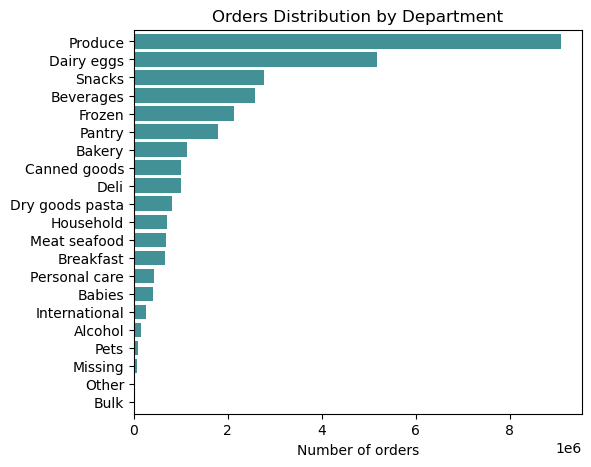

In [118]:
# Create a bar plot
bar_ordersperdepartment = ords_prods_high_act_cust['department'].value_counts().sort_values().plot.barh(
    color='#419197',
    width=0.8
)

# Set axis labels and title
plt.xlabel('Number of orders')
plt.title('Orders Distribution by Department')

# Adjust the layout to avoid cutting off the graph 
plt.subplots_adjust(left=0.25, right=0.95, top=0.9, bottom=0.1)

# Export the plot
bar_ordersperdepartment.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_ordersperdepartment.png'))

### Key Question4 : What’s the distribution among users in regards to their brand loyalty?
(i.e., how often do they return to Instacart)

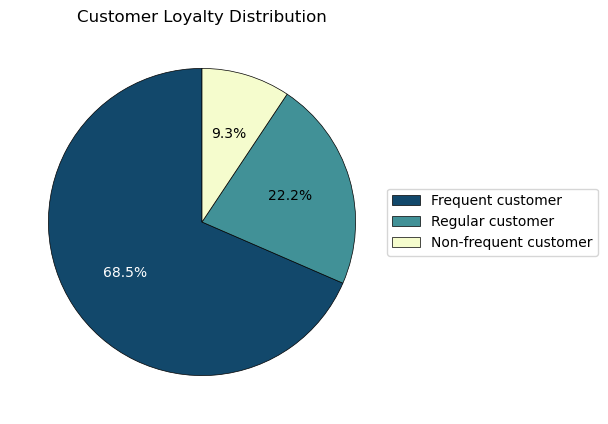

In [131]:
# create loyalty pie chart
pie_loyalty = ords_prods_high_act_cust['order_frequency_flag'].value_counts().plot.pie(startangle = 90,
                                                          autopct='%1.1f%%',
                                                          colors = ['#12486B','#419197','#F5FCCD'],
                                                            labeldistance = None,
                                                           wedgeprops={'edgecolor':'black','linewidth':.5})

# set one of the % labels as white
pie_loyalty.texts[0].set_color('white')

#Adjust the position of the legend
plt.legend(loc = 'center right',
          bbox_to_anchor=(1.05, 0, 0.5, 1)) #sets position of legend box in relation to pie chart
          
# Add title and labels
plt.title('Customer Loyalty Distribution')
plt.ylabel(None) 

# Set position of pie chart in page
plt.subplots_adjust(left=0, right=0.7, top=0.9, bottom=0.1)

# Export the plot
pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pie_loyalty.png'))

## Key Question 5: Are there differences in ordering habits based on a customer’s loyalty status?


### Key Question 5a: Distribution of order price based on loyalty

Price Label:
- If price is <= 5 then "Low-range product"
- if price is >5 and <=15 then "Mid-range product"
- if price is > 15 then "High-range product""

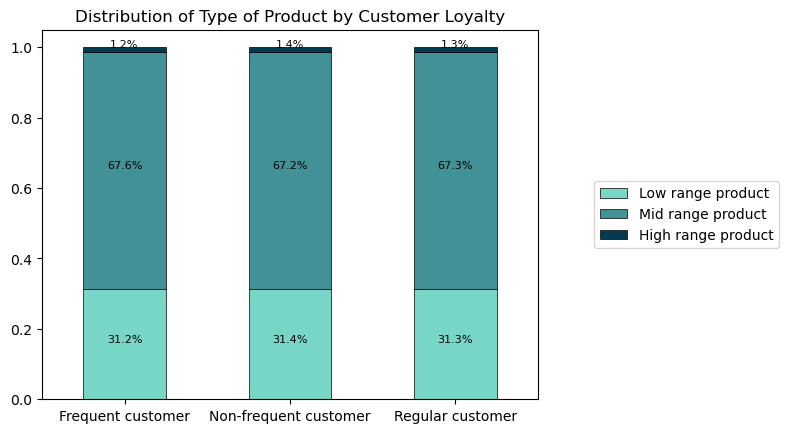

In [4]:
# Group the data by 'order_frequency_flag' and 'price_range_loc' and count occurrences
grouped = ords_prods_high_act_cust.groupby(['order_frequency_flag', 'price_range_loc']).size().unstack(fill_value=0)

# Reorder the columns to 'Low range product', 'Mid range product', 'High range product'
grouped = grouped[['Low range product', 'Mid range product', 'High range product']]

# Normalize the data to sum up to 100% for each group
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

# Create a grouped bar plot
ax = grouped_normalized.plot(kind='bar', 
                             stacked=True, 
                             color=['#78D6C6','#419197','#053B50'],
                             edgecolor='black', linewidth=0.5)

# Set axis labels and title
plt.xlabel(None)
plt.ylabel(None)
plt.title('Distribution of Type of Product by Customer Loyalty')

# Rotate the label to horizontal
ax.set_xticklabels(grouped_normalized.index, rotation=0)

# Add labels for each bar segment
for bar in ax.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    label = f'{height:.1%}'
    va = 'top' if 'High range product' in label else 'bottom' #adjusts the position of label so it's legible
    ax.annotate(label, (x + width/2, y + height/2), ha='center', va=va, fontsize=8)

# Adjust the position of the legend
plt.legend(loc = 'center right',
          bbox_to_anchor=(1, 0, 0.5, 1)) #sets position of legend box in relation to pie chart

# Export the plot
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bargrouped_loyalty_price.png'))

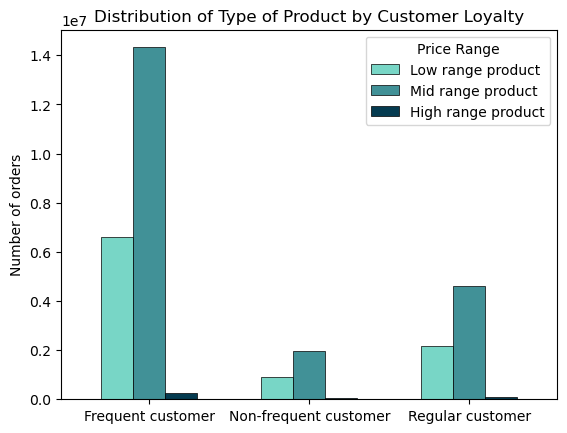

In [63]:
# Group the data by 'order_frequency_flag' and 'price_range_loc' and count occurrences
grouped = ords_prods_high_act_cust.groupby(['order_frequency_flag', 'price_range_loc']).size().unstack(fill_value=0)

# Reorder the columns to 'Low range product,' 'Mid range product,' 'High range product'
grouped = grouped[['Low range product', 'Mid range product', 'High range product']]

# Create a grouped bar plot with bars side by side
ax = grouped.plot(kind='bar', color=['#78D6C6', '#419197', '#053B50'], edgecolor='black', linewidth=0.5, width=0.6)

# Set axis labels and title
plt.xlabel(None)
plt.ylabel('Number of orders')
plt.title('Distribution of Type of Product by Customer Loyalty')

# Rotate the label to horizontal
ax.set_xticklabels(grouped_normalized.index, rotation=0)

# Add a legend for price categories
plt.legend(title='Price Range', labels=['Low range product', 'Mid range product', 'High range product'], loc='upper right')

# Export the plot
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_loyalty_price.png'))


### Key Question 5b: Distribution of prices by day of week based on loyalty

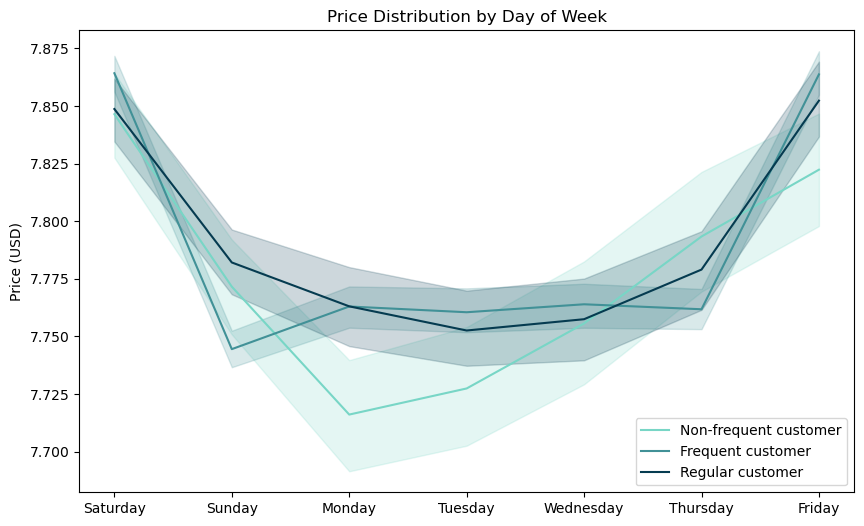

In [83]:
# Create a dictionary to map index labels to the desired day names
day_names = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
}

# Reduce the sample to only the columns needed for the chart (using small sample)
ords_prods_small_dow_loyalty = small[['orders_day_of_week', 'prices', 'order_frequency_flag']]

# Create a line chart with three lines based on 'order_frequency_flag'
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each line
colors = ['#78D6C6', '#419197', '#053B50']

# Iterate over unique values in 'order_frequency_flag' to separate lines by loyalty
for i, order_freq in enumerate(ords_prods_small_dow_loyalty['order_frequency_flag'].unique()):
    subset = ords_prods_small_dow_loyalty[ords_prods_small_dow_loyalty['order_frequency_flag'] == order_freq]
    sns.lineplot(data=subset, x='orders_day_of_week', y='prices', label=order_freq, color=colors[i])

# Set labels and title
ax.set_xlabel(None)
ax.set_ylabel('Price (USD)')
ax.set_title('Price Distribution by Day of Week')

# Update x-axis labels to use day names
ax.set_xticks(list(day_names.keys()))
ax.set_xticklabels(list(day_names.values()), rotation=0)

# Add a legend
ax.legend(loc='lower right')

# Export visualization
path = r'C:\Users\bruna\Career Foundry\08-2023 Instacart Basket Analysis'
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_price_dow_loyalty.png'))

### Key Question 5c: Distribution of prices by hour of day based on loyalty

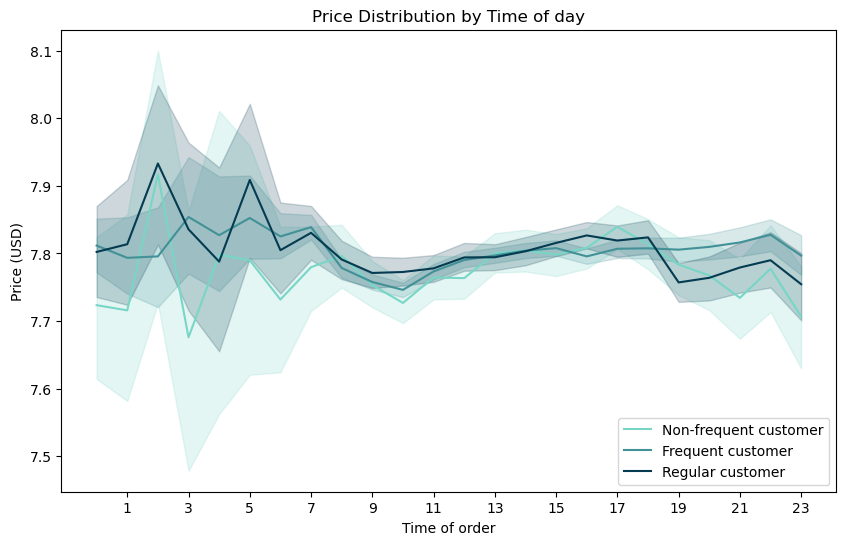

In [7]:
# Reduce the sample to only the columns needed for the chart (using small sample)
ords_prods_small_time_loyalty = small[['time_of_order', 'prices', 'order_frequency_flag']]

# Create a line chart with three lines based on 'order_frequency_flag'
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each line
colors = ['#78D6C6', '#419197', '#053B50']

# Iterate over unique values in 'order_frequency_flag' to separate lines by loyalty
for i, order_freq in enumerate(ords_prods_small_time_loyalty['order_frequency_flag'].unique()):
    subset = ords_prods_small_time_loyalty[ords_prods_small_time_loyalty['order_frequency_flag'] == order_freq]
    sns.lineplot(data=subset, x='time_of_order', y='prices', label=order_freq, color=colors[i])

# Set labels and title
ax.set_xlabel('Time of order')
ax.set_ylabel('Price (USD)')
ax.set_title('Price Distribution by Time of day')

# Customize x-axis ticks and labels
ax.set_xticks(range(1, 25, 2))  # Start at 1, end at 24, with a step of 2
ax.set_xticklabels([str(i) for i in range(1, 25, 2)])  # Custom labels

# Add a legend
ax.legend(loc='lower right')

# Export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_price_time_loyalty.png'))


### Key Question 5d: Distribution of nr of orders by day of week based on loyalty

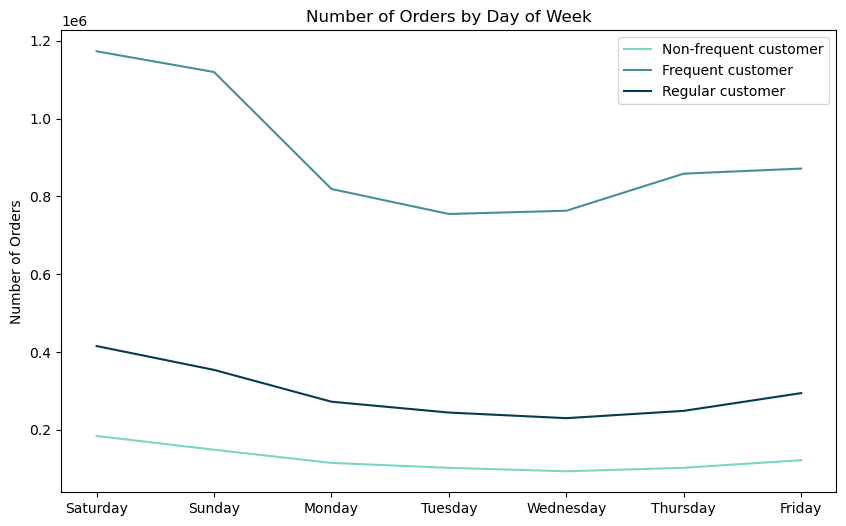

In [167]:
# Create a dictionary to map index labels to the desired day names
day_names = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
}

# Reduce the sample to only the columns needed for the chart (using small sample)
ords_prods_small_dow_loyalty = small[['orders_day_of_week', 'order_frequency_flag']]

# Create a line chart with three lines based on 'order_frequency_flag'
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each line
colors = ['#78D6C6', '#419197', '#053B50']

# Iterate over unique values in 'order_frequency_flag' to separate lines by loyalty
for i, order_freq in enumerate(ords_prods_small_dow_loyalty['order_frequency_flag'].unique()):
    subset = ords_prods_small_dow_loyalty[ords_prods_small_dow_loyalty['order_frequency_flag'] == order_freq]
    
    # Calculate the count of each day for the current loyalty type
    day_counts = subset['orders_day_of_week'].value_counts().sort_index()
    
    sns.lineplot(data=day_counts, label=order_freq, color=colors[i])

# Set labels and title
ax.set_xlabel(None)
ax.set_ylabel('Number of Orders')
ax.set_title('Number of Orders by Day of Week')

# Update x-axis labels to use day names
ax.set_xticks(list(day_names.keys()))
ax.set_xticklabels(list(day_names.values()), rotation=0)

# Add a legend
ax.legend(loc='upper right')

# Export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_orders_dow_loyalty.png'))

### Key Question 5e: Distribution of nr of orders by time of day based on loyalty

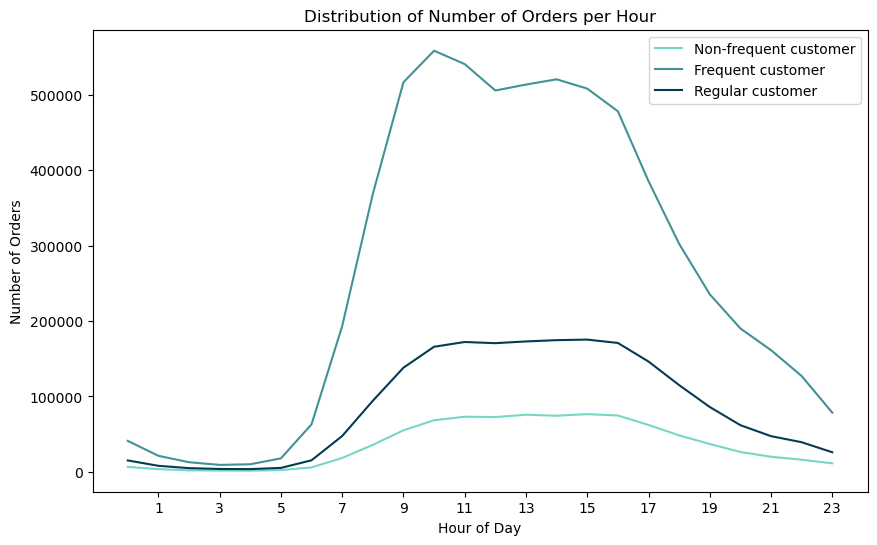

In [9]:
# Reduce the sample to only the columns needed for the chart (using small sample)
ords_prods_small_time_loyalty = small[['time_of_order', 'order_frequency_flag']]

# Create a line chart with three lines based on 'order_frequency_flag'
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each line
colors = ['#78D6C6', '#419197', '#053B50']

# Iterate over unique values in 'order_frequency_flag' to separate lines by loyalty
for i, order_freq in enumerate(ords_prods_small_time_loyalty['order_frequency_flag'].unique()):
    subset = ords_prods_small_time_loyalty[ords_prods_small_time_loyalty['order_frequency_flag'] == order_freq]
    
    # Calculate the count of each day for the current loyalty type
    day_counts = subset['time_of_order'].value_counts().sort_index()
    sns.lineplot(data=day_counts, label=order_freq, color=colors[i])

# Set labels and title
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Orders')
ax.set_title('Distribution of Number of Orders per Hour')


# Customize x-axis ticks and labels
ax.set_xticks(range(1, 25, 2))  # Start at 1, end at 24, with a step of 2
ax.set_xticklabels([str(i) for i in range(1, 25, 2)])  # Custom labels

# Add a legend
ax.legend(loc='upper right')

# Export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_orders_time_loyalty.png'))

### Key Question 5f: Top departments (count of orders) by loyalty group

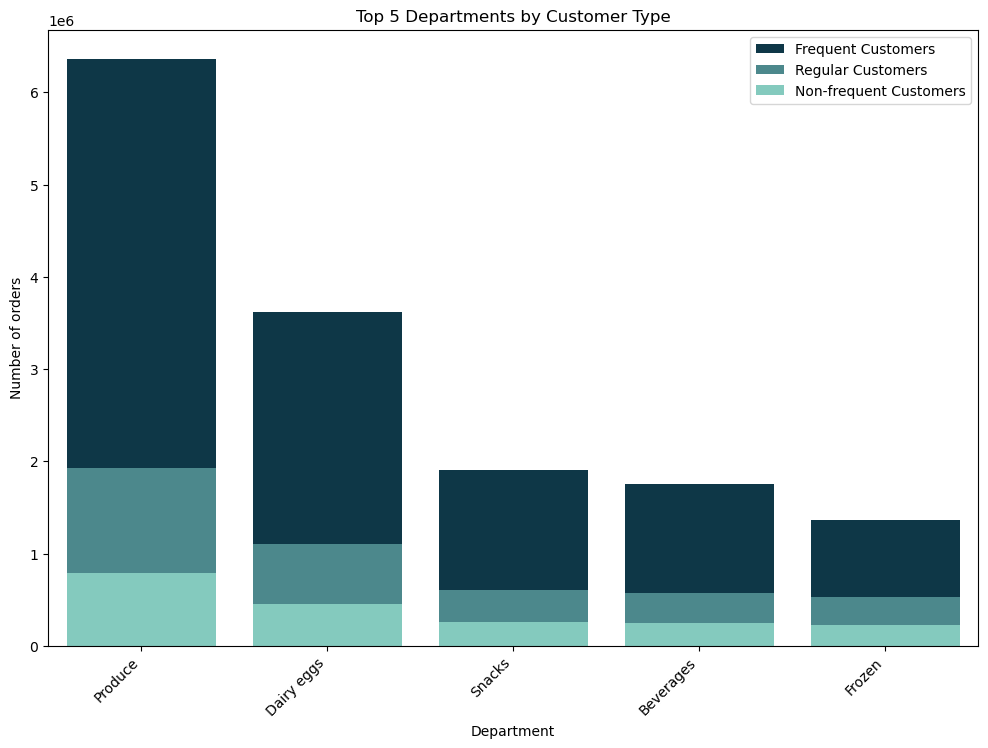

In [5]:
# Filter the data for each customer type
frequent_customers = ords_prods_high_act_cust[ords_prods_high_act_cust['order_frequency_flag'] == 'Frequent customer']
regular_customers = ords_prods_high_act_cust[ords_prods_high_act_cust['order_frequency_flag'] == 'Regular customer']
non_frequent_customers = ords_prods_high_act_cust[ords_prods_high_act_cust['order_frequency_flag'] == 'Non-frequent customer']

# Calculate the top 5 departments for each customer type
top_departments_frequent = frequent_customers['department'].value_counts().nlargest(5)
top_departments_regular = regular_customers['department'].value_counts().nlargest(5)
top_departments_non_frequent = non_frequent_customers['department'].value_counts().nlargest(5)

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the top departments for each customer type
sns.barplot(x=top_departments_frequent.index, y=top_departments_frequent.values, color='#053B50', ax=ax, label='Frequent Customers')
sns.barplot(x=top_departments_regular.index, y=top_departments_regular.values, color='#419197', ax=ax, label='Regular Customers')
sns.barplot(x=top_departments_non_frequent.index, y=top_departments_non_frequent.values, color='#78D6C6', ax=ax, label='Non-frequent Customers')

# Set labels and title
ax.set_xlabel('Department')
ax.set_ylabel('Number of orders')
ax.set_title('Top 5 Departments by Customer Type')

# Rotate x-axis labels for better readability (optional)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add a legend
ax.legend()

# Export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_departments_loyalty.png'))

The top 5 departments are the same accross the 3 types of customers (Produce, Dairy eggs, Snacks, Beverages and Frozen). No differences found in the distribution.